In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import cv2
import seaborn as sns
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [1]:
# loading the mnist data set

In [5]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

In [6]:
type(X_train)

numpy.ndarray

In [7]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


Here we can see training data is 60000 images and test data is 10000 images

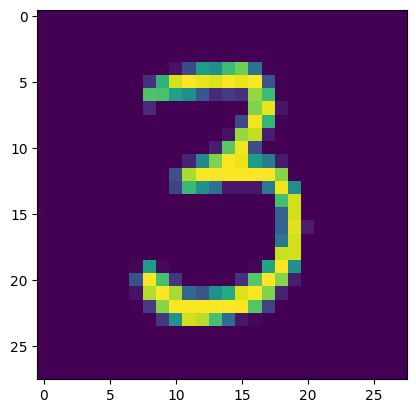

3


In [9]:
# displaying the image

plt.imshow(X_train[50])
plt.show()

print(Y_train[50])

In [10]:
#  image labels

print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


we can use these labels as such or we can also apply one hot encoding

all the images have same dimensions in the dataset. if not we have to resize all the images to a common dimension

In [11]:
# scaling the values
X_train = X_train/255
X_test = X_test/255

In [12]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building a Neural Network

In [14]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

In [15]:
# compiling the neural network

model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [17]:
# training the neural network
model.fit(X_train, Y_train, epochs=20)


Epoch 1/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3098 - accuracy: 0.9096
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1453 - accuracy: 0.9568
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1052 - accuracy: 0.9683
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0851 - accuracy: 0.9743
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0703 - accuracy: 0.9782
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0612 - accuracy: 0.9809
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0518 - accuracy: 0.9839
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0460 - accuracy: 0.9855
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0412 - accuracy: 0.9869
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.03

In [18]:
#  training data accuracy = 99%

# model on test data

loss, accuracy = model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.1223 - accuracy: 0.9729


In [19]:
print(accuracy)

0.9728999733924866


In [20]:
print(loss)

0.12233752757310867


7


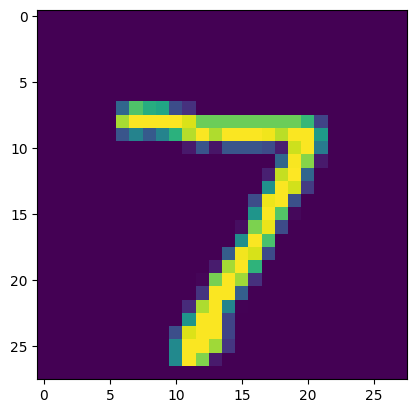

In [21]:
plt.imshow(X_test[0])
plt.show
print(Y_test[0])

In [22]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [23]:
Y_pred.shape

(10000, 10)

In [24]:
print(Y_pred[0])

[7.5140363e-12 1.0290950e-01 5.9682738e-05 6.4343452e-01 7.5336306e-05
 1.2904866e-02 3.3889953e-11 1.0000000e+00 9.3943760e-04 2.6740332e-03]


model.predict gives gives prediction probabilities of each class for that data point

In [25]:
# converting the prediction probabilities into class labels

label_for_first_image=np.argmax(Y_pred[0])
print(label_for_first_image)

7


In [26]:
# converting prediction probalilities to class label for all test data points

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_preds are ture labels and y_pred_labes are values of predicted labels

In [28]:
# confusion matrix

matrix = confusion_matrix(Y_test, Y_pred_labels)

In [29]:
print(matrix)

tf.Tensor(
[[ 968    1    2    0    1    1    4    1    1    1]
 [   0 1123    5    1    1    1    1    2    1    0]
 [   4    0 1013    2    1    0    4    6    2    0]
 [   0    1    7  975    0    6    0    3    4   14]
 [   0    0    5    0  958    0    7    0    0   12]
 [   3    0    0   14    0  856    4    1    6    8]
 [   6    4    4    1    8    2  931    0    2    0]
 [   1    2   10    0    0    0    0  998    2   15]
 [   7    1    9   11    8    0    3    3  924    8]
 [   1    2    0    3   11    3    0    4    1  984]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Label')

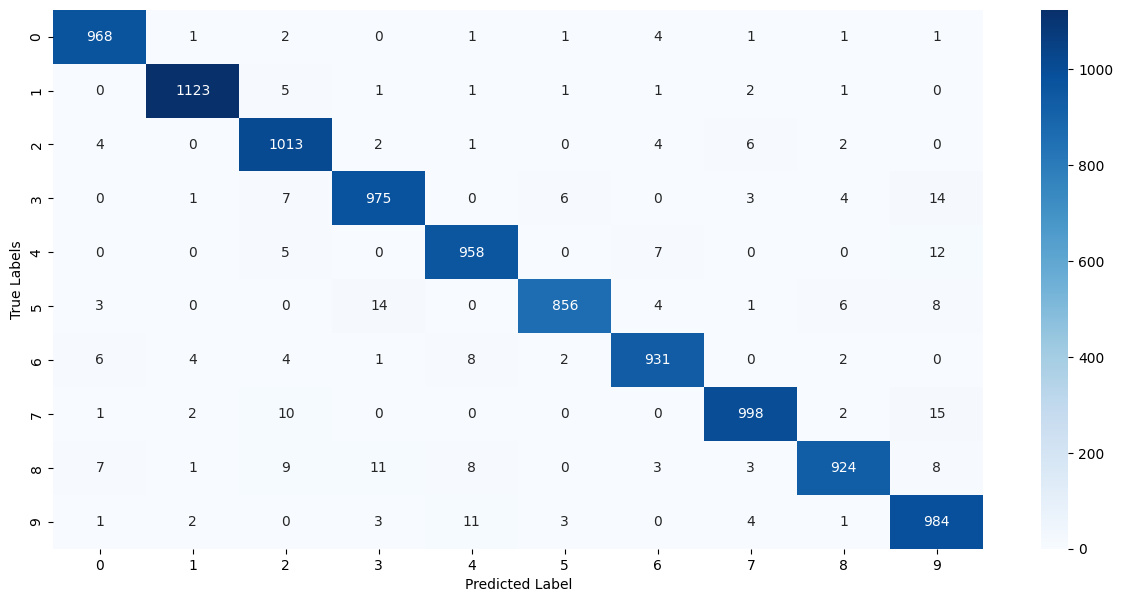

In [31]:
plt.figure(figsize=(15,7))
sns.heatmap(matrix, annot = True , fmt ='d', cmap = 'Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Label')


In [47]:
#  building a predictive system

input_image_path = '/content/image mnist.png'
input_image = cv2.imread(input_image_path)

In [48]:
type(input_image)

numpy.ndarray

In [49]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


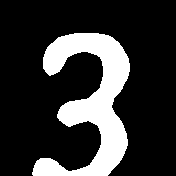

In [50]:
cv2_imshow(input_image)

In [51]:
input_image.shape

(176, 176, 3)

In [52]:
grayscale = cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [53]:
grayscale.shape

(176, 176)

In [54]:
input_image_resize = cv2.resize(grayscale,(28,28))

In [55]:
input_image_resize.shape

(28, 28)

In [56]:
cv2_imshow(input_image_resize)

In [57]:
input_image_resize=input_image_resize/255


In [58]:
image_reshaped = np.reshape(input_image_resize,[1,28,28])

In [59]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 26ms/step
[[3.2373212e-10 7.2405343e-10 9.8289049e-01 9.9999982e-01 9.3399324e-22
  3.7607944e-03 2.5937355e-21 1.0000000e+00 2.3563660e-03 9.9336290e-01]]


In [60]:
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

7


paste path of image here :/content/mnist_test_0-7.png


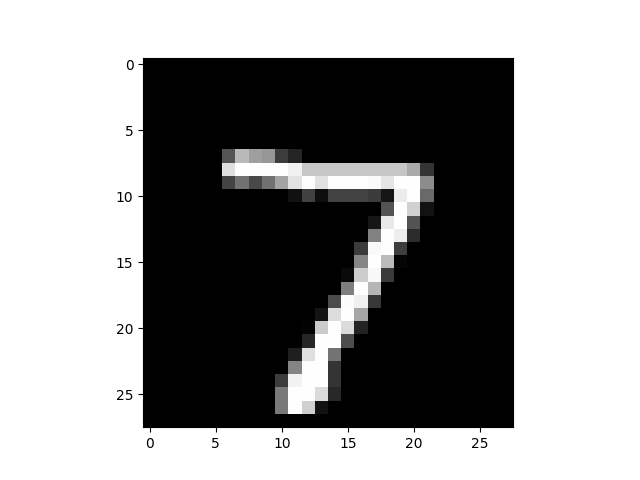

1/1 [==============================] - 0s 22ms/step
The Handwritten Digit is recognised as  3


In [62]:
# predictive system combined

input_image_path = input('paste path of image here :')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)